# Caso de estudio

Se analizaran los datos que se tienen en la [base de datos](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) obtenida en los repositorios de Kaggle para el vino. Y se intentara predecir la calidad de los vinos segun las caracteristicas que se encuentren tengan mayor correlacion.

## 1. Estructuracion de los datos

### Adquisicion de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('winequality-red.csv')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Exploracion de los datos 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Cantidad de botellas')

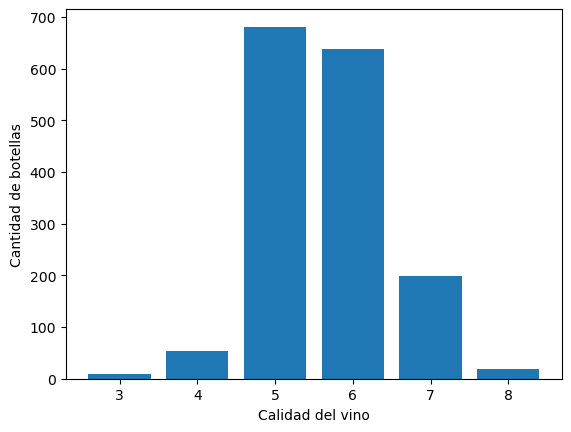

In [5]:
import matplotlib.pyplot as plt



plt.bar(data['quality'].value_counts().index, data['quality'].value_counts().values)
plt.xlabel('Calidad del vino')
plt.ylabel('Cantidad de botellas')

Text(0, 0.5, 'Fixed Acidity')

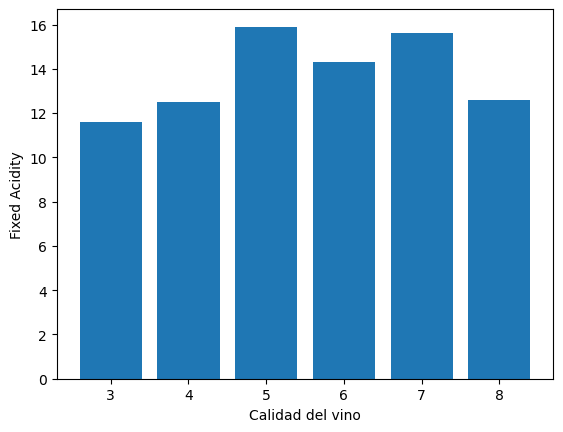

In [6]:
plt.bar(data['quality'], data['fixed acidity'])
plt.xlabel('Calidad del vino')
plt.ylabel('Fixed Acidity')

La fixed acidity no tiene mucha correlacion con la calidad del vino

Text(0, 0.5, 'Volatile Acidity')

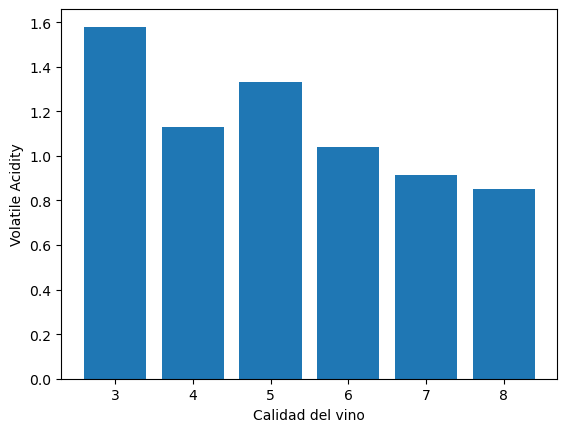

In [7]:
plt.bar(data['quality'], data['volatile acidity'])
plt.xlabel('Calidad del vino')
plt.ylabel('Volatile Acidity')

Text(0, 0.5, 'Citric Acid')

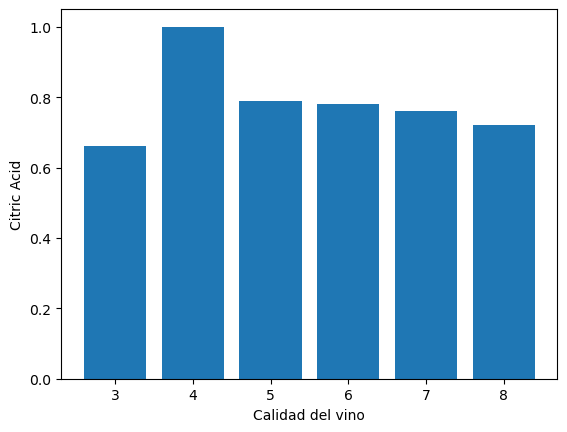

In [8]:
plt.bar(data['quality'], data['citric acid'])
plt.xlabel('Calidad del vino')
plt.ylabel('Citric Acid')

El citric acid no tiene mucha correlacion con la calidad del vino

Text(0, 0.5, 'Residual Sugar')

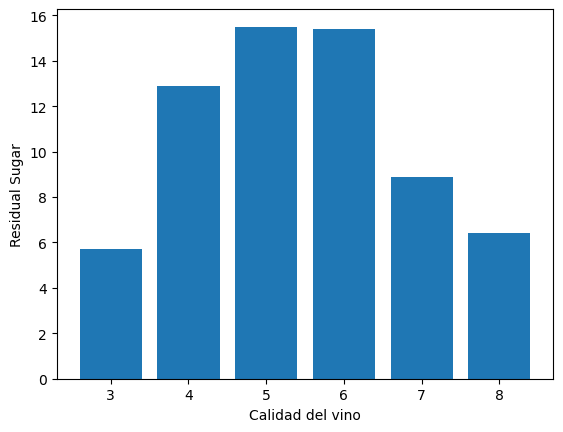

In [9]:
plt.bar(data['quality'], data['residual sugar'])
plt.xlabel('Calidad del vino')
plt.ylabel('Residual Sugar')

Text(0, 0.5, 'Chlorides')

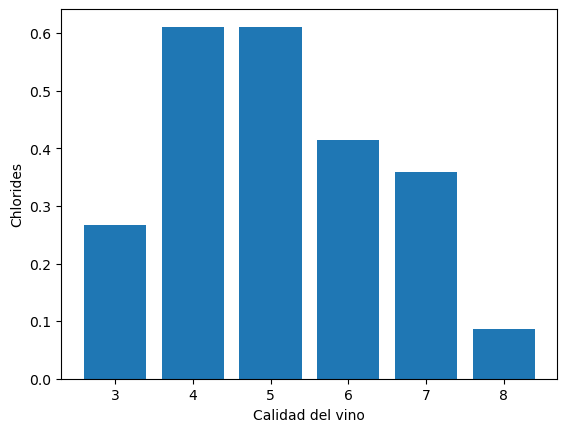

In [10]:
plt.bar(data['quality'], data['chlorides'])
plt.xlabel('Calidad del vino')
plt.ylabel('Chlorides')

Text(0, 0.5, 'Free Sulfur Dioxide')

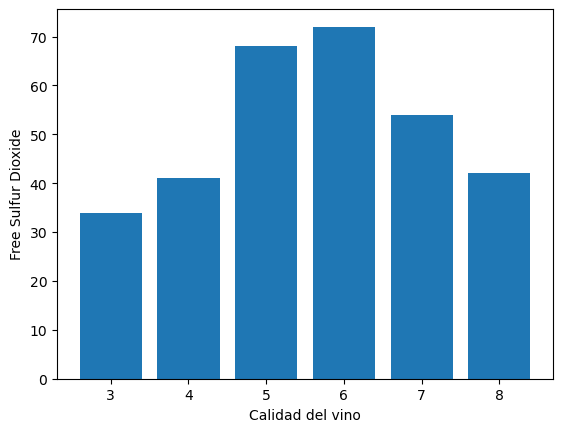

In [11]:
plt.bar(data['quality'], data['free sulfur dioxide'])
plt.xlabel('Calidad del vino')
plt.ylabel('Free Sulfur Dioxide')

Text(0, 0.5, 'total sulfur dioxide')

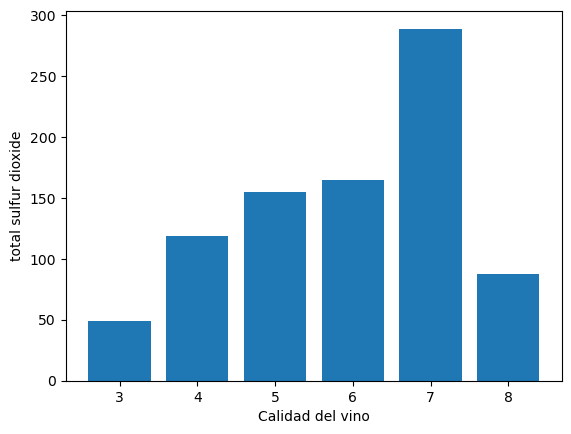

In [12]:
plt.bar(data['quality'], data['total sulfur dioxide'])
plt.xlabel('Calidad del vino')
plt.ylabel('total sulfur dioxide')

Text(0, 0.5, 'Density')

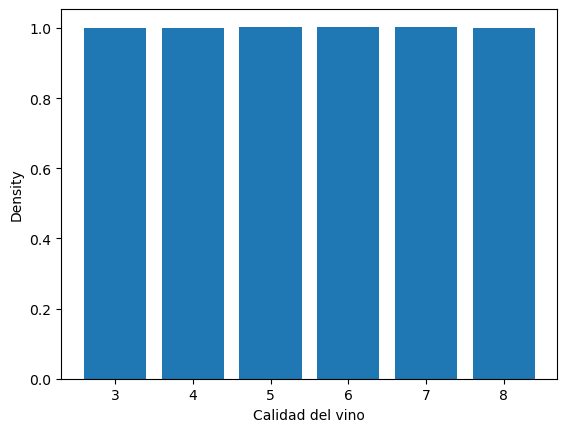

In [13]:
plt.bar(data['quality'], data['density'])
plt.xlabel('Calidad del vino')
plt.ylabel('Density')

La densidad no tiene mucha correlacion con la calidad del vino

Text(0, 0.5, 'pH')

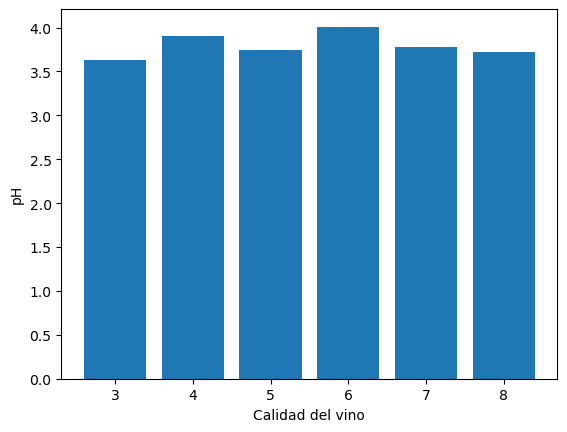

In [14]:
plt.bar(data['quality'], data['pH'])
plt.xlabel('Calidad del vino')
plt.ylabel('pH')

El pH no tiene mucha correlacion con la calidad del vino

Text(0, 0.5, 'Sulphates')

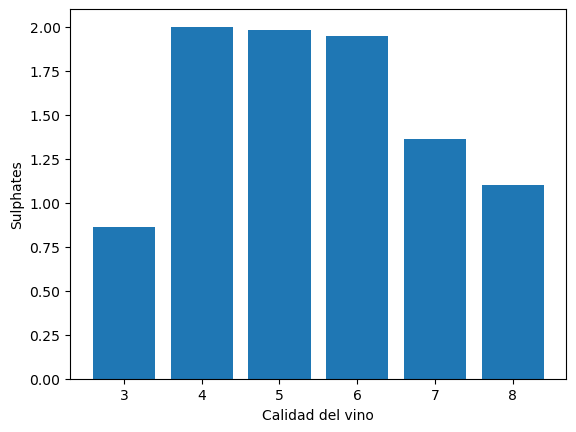

In [15]:
plt.bar(data['quality'], data['sulphates'])
plt.xlabel('Calidad del vino')
plt.ylabel('Sulphates')

Text(0, 0.5, 'Alcohol')

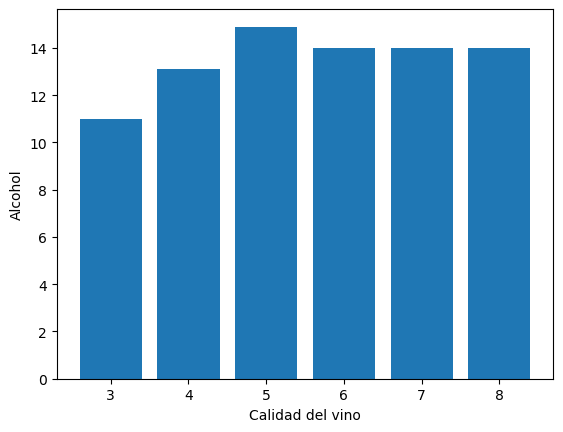

In [16]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('Calidad del vino')
plt.ylabel('Alcohol')

El alcohol no tiene mucha correlacion con la calidad del vino

### Prepocesamiento de Datos

Limitamos el estudio a las caracteristicas que si tienen correlacion con la calidad del vino

In [17]:
data_study = data[['quality', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates']]

data_study.head()

,quality,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,chlorides,sulphates
0,5,0.70,1.9,11.0,34.0,0.076,0.56
1,5,0.88,2.6,25.0,67.0,0.098,0.68
2,5,0.76,2.3,15.0,54.0,0.092,0.65
3,6,0.28,1.9,17.0,60.0,0.075,0.58
4,5,0.70,1.9,11.0,34.0,0.076,0.56


In [18]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data_study['quality'] = pd.cut(data_study['quality'], bins = bins, labels = group_names)

C:\Users\roman\AppData\Local\Temp\ipykernel_27828\927796159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_study['quality'] = pd.cut(data_study['quality'], bins = bins, labels = group_names)


In [19]:
data_study.sample(10)

,quality,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,chlorides,sulphates
832,bad,0.440,1.5,34.0,48.0,0.145,0.86
48,bad,0.400,1.6,5.0,12.0,0.066,0.56
1317,bad,0.440,2.2,10.0,41.0,0.091,0.69
391,bad,0.415,2.9,17.0,43.0,0.085,0.80
719,bad,0.660,3.9,17.0,45.0,0.086,0.54
1122,bad,0.470,1.4,27.0,33.0,0.055,0.48
180,bad,0.610,2.4,10.0,42.0,0.067,0.59
1090,good,0.260,1.9,42.0,74.0,0.083,0.63
1524,bad,0.420,2.0,22.0,47.0,0.075,0.78
430,good,0.240,2.1,6.0,24.0,0.066,0.90


In [22]:
data_study['quality'] = data_study['quality'].map({'bad':0, 'good':1})

C:\Users\roman\AppData\Local\Temp\ipykernel_27828\2696327137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_study['quality'] = data_study['quality'].map({'bad':0, 'good':1})


In [23]:
data_study.sample(10)

,quality,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,chlorides,sulphates
1358,0,0.64,5.4,52.0,98.0,0.168,0.50
1143,0,0.22,1.8,16.0,20.0,0.065,0.82
1091,0,0.34,2.0,8.0,19.0,0.086,0.60
306,0,0.62,2.2,7.0,54.0,0.082,0.52
1116,0,0.69,2.5,15.0,21.0,0.091,0.60
1373,0,0.75,3.8,34.0,89.0,0.110,0.45
1090,1,0.26,1.9,42.0,74.0,0.083,0.63
794,0,0.27,2.3,7.0,26.0,0.065,0.53
45,0,0.52,2.1,8.0,65.0,0.054,0.56
822,0,0.54,2.0,15.0,36.0,0.076,0.64


## 2. Modelo de Aprendizaje

In [24]:
X = data_study[['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates']].values

X

array([[ 0.7  ,  1.9  , 11.   , 34.   ,  0.076,  0.56 ],
       [ 0.88 ,  2.6  , 25.   , 67.   ,  0.098,  0.68 ],
       [ 0.76 ,  2.3  , 15.   , 54.   ,  0.092,  0.65 ],
       ...,
       [ 0.51 ,  2.3  , 29.   , 40.   ,  0.076,  0.75 ],
       [ 0.645,  2.   , 32.   , 44.   ,  0.075,  0.71 ],
       [ 0.31 ,  3.6  , 18.   , 42.   ,  0.067,  0.66 ]])

In [25]:
y = data_study['quality'].values

y

[0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0]
Length: 1599
Categories (2, int64): [0 < 1]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8825

In [31]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.86

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.8625

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.85

In [34]:
from sklearn.linear_model import Perceptron

p = Perceptron()
p.fit(X_train, y_train)
p.score(X_test, y_test)

0.76

## 3. Reportes y Resultados 

In [35]:
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200),
    'SVC': SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression(),
    "Perceptron": Perceptron()
}

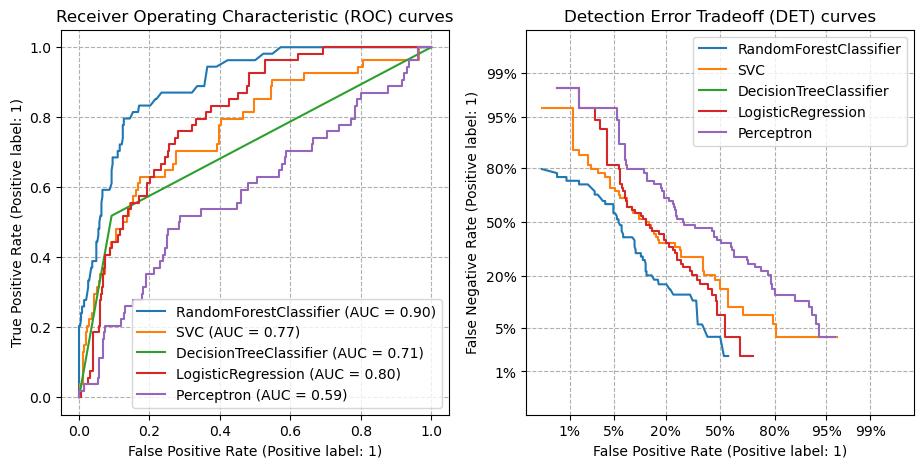

In [38]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name=name)


ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")
ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")
plt.legend()